In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas_profiling
from sklearn.preprocessing import LabelEncoder

<h3> Datos del proyecto </h3>
<p> Data Storytelling </p>

In [2]:
df = pd.read_csv('C:/Users/chech/PC Febrero 2023/CoderHouse/Data Scients/proyectoCoder/finalProject/data/movDic.csv')

# Reduccoón de dataset, eliminando las variables con mayor cantidad de valores nulos.
df_1 = df[['ID. Grupo','Nombre Grupo', 'ID. Origen', 'Nombre Origen', 'ID. Canal', 'Nombre Canal', 'ID. Terminal', 'Nombre Terminal', 'ID. Transaccion','Nombre Transaccion',
           'Error','Nombre Error', 'Valor','Fecha Transaccion', 'Codigo Entidad Orgien','Cooperativa Terminal','Serial Terminal', 'Tipo Cuenta 1',
           'Cuenta 1','Tipo Documento','Documento']]

# Data wrangling: Las transacciones de consulta, registrar valor 0 (cero) en la columna "Valor"
df_1.loc[df_1['Nombre Transaccion'].str.contains('Consul'), 'Valor'] = 0

C:\Users\chech\AppData\Local\Temp\ipykernel_17536\4027922283.py:1: DtypeWarning: Columns (29,34,35,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/chech/PC Febrero 2023/CoderHouse/Data Scients/proyectoCoder/finalProject/data/movDic.csv')


In [3]:
# Actualizar los valores de la columna "Valor" según la condición
df_1.loc[df_1['Nombre Error'] != 'Exito', 'Valor'] = 0

def rangos(valor):
    if valor > 100000000:
        return '+ 100 m'
    elif valor > 50000000 and valor <= 100000000:
        return '50 m-100 m'
    elif valor > 20000000 and valor <= 50000000:
        return '20 m-50 m'
    elif valor > 5000000 and valor <= 20000000:
        return '5 m-20 m'
    elif valor > 1000000 and valor <= 5000000:
        return '1 m-5 m'
    elif valor > 200000 and valor <= 1000000:
        return '200-1 m'
    elif valor > 50000 and valor <= 200000:
        return '50-200'
    elif valor > 10000 and valor <= 50000:
        return '10-50'
    elif valor > 1 and valor <= 10000:
        return '1-10'
    else:
        return 'Cero'
df_1['NombreRango'] = df_1['Valor'].apply(rangos)

C:\Users\chech\AppData\Local\Temp\ipykernel_17536\3190226987.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['NombreRango'] = df_1['Valor'].apply(rangos)


<h1> Obtención de insights </h1>

In [36]:
df_2 = df_1[['ID. Grupo', 'ID. Origen', 'ID. Canal','Nombre Canal','ID. Terminal', 'ID. Transaccion','Nombre Transaccion','Error', 'Valor','Fecha Transaccion', 'Codigo Entidad Orgien', 'Tipo Cuenta 1'
             ,'Tipo Documento','Documento', 'NombreRango']]

# Convertir la columna 'Fecha Transaccion' a tipo datetime
df_2['Fecha Transaccion'] = pd.to_datetime(df_2['Fecha Transaccion'])

# Aplicar el formato deseado a la columna 'Fecha Transaccion'
df_2['Fecha Transaccion'] = df_2['Fecha Transaccion'].dt.strftime('%d/%m/%Y')

C:\Users\chech\AppData\Local\Temp\ipykernel_17536\1664616823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Fecha Transaccion'] = pd.to_datetime(df_2['Fecha Transaccion'])
C:\Users\chech\AppData\Local\Temp\ipykernel_17536\1664616823.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Fecha Transaccion'] = df_2['Fecha Transaccion'].dt.strftime('%d/%m/%Y')


In [37]:
# Eliminar las filas con valores no finitos en la columna "Documento"
df_2 = df_2.dropna(subset=['Documento'])

# Convertir los valores en la columna "Documento" de tipo float64 a int64
df_2["Documento"] = df_2["Documento"].astype('int64')

In [38]:
label_encoder = LabelEncoder()
df_2['ID. Grupo'] = label_encoder.fit_transform(df_2['ID. Grupo'])
df_2['ID. Terminal'] = label_encoder.fit_transform(df_2['ID. Terminal'])
df_2['ID. Transaccion'] = label_encoder.fit_transform(df_2['ID. Transaccion'])
df_2['Rango'] = label_encoder.fit_transform(df_2['NombreRango'])
df_2['Fecha Transaccion'] = label_encoder.fit_transform(df_2['Fecha Transaccion'])
df_2['Tipo Documento'] = label_encoder.fit_transform(df_2['Tipo Documento'])

In [ ]:
df_2.sample(6)

,ID. Grupo,ID. Origen,ID. Canal,Nombre Canal,ID. Terminal,ID. Transaccion,Nombre Transaccion,Error,Valor,Fecha Transaccion,Codigo Entidad Orgien,Tipo Cuenta 1,Tipo Documento,Documento,NombreRango,Rango
80165,0,1,2,POS,7,0,Compra,0,145000,21,93,10.0,0,1116275511,50-200,8
35576,0,3,1,Cajeros automaticos,3,3,Retiro,0,600000,26,22,10.0,0,22565209,200-1 m,5
543268,0,6,0,Oficinas,0,3,Retiro,0,426000,4,7,10.0,0,1064837803,200-1 m,5
695426,0,1,2,POS,7,0,Compra,0,102000,16,10,10.0,0,1083882077,50-200,8
100560,0,6,4,Portal transaccional (Web),13,3,Retiro,0,64615,29,134,10.0,0,1075666569,50-200,8
939801,0,1,2,POS,7,0,Compra,7104,0,26,44,50.0,0,79904442,Cero,9
727391,0,6,5,Banca Movil,16,16,Transferencias YA - Enviar Dinero,0,63000,21,47,10.0,0,55143735,50-200,8
24352,0,3,1,Cajeros automaticos,4,3,Retiro,0,200000,26,46,10.0,0,37924182,50-200,8
190837,0,6,0,Oficinas,0,3,Retiro,0,500000,17,27,10.0,0,1102359131,200-1 m,5
400883,0,3,1,Cajeros automaticos,5,3,Retiro,0,600000,5,152,10.0,0,28739147,200-1 m,5


<p> Debido al tamaño de df, se plantea la alternativa de analizar la data por rangos

<h1> Insights</h1>
<li> El canal "Sistema de Audio respuesta (IVR)" no se utiliza cuando los usuarios realizan movimientos de dinero entre $ 200.000 y $ 1'000.000. El resto de canales se comportan de manera muy uniforme con respecto al valor retirado.
<li>  La distribución de los retiros en el rango analizado esta muy concetrado entre $ 500.000 y $ 600.000, coincide con que $ 600.000 es el valor con mayor frecuencia. y el canal con mayor uso es Cajeros automaticos, de igual manera la compañia tiene una politica de seguridad en la cual el monto maximo que se puede retirar es $ 600.000.
<li> luego del Insights, se plantea a la gerencia de la empresa, analizar las implicaciones para aumentar el valor maximo de retiro en cajero automatico. Esto con el fin de impactar el tiempo del usuario y ahorrarle más de un retiro para llegar a la cifra que estos necesitan.
<li> Los canales más importantes y con mayor uso para las transacciones entre $ 200.000 y $ 1'000.000 son: Cajeros automaticos, Oficinas, Portal transaccional (Web).

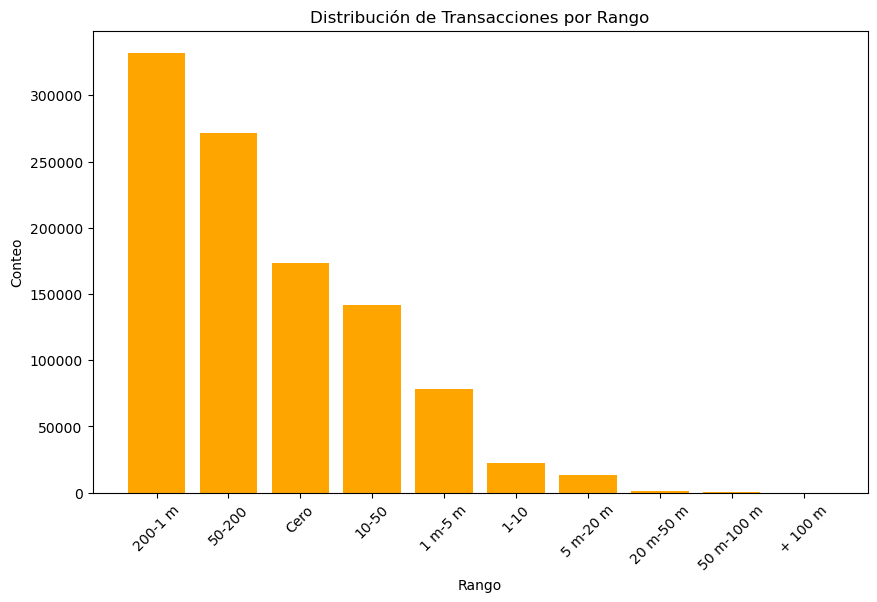

In [40]:
conteo_rangos = df_2['NombreRango'].value_counts()

# Configurar Matplotlib para mostrar figuras en Jupyter Notebook
%matplotlib inline

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo_rangos.index, conteo_rangos.values, color='orange')

# Personalizar la gráfica
plt.title('Distribución de Transacciones por Rango')
plt.xlabel('Rango')
plt.ylabel('Conteo')

# Rotar las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

In [41]:
data1 = df_2[df_2['Rango'] == 5]

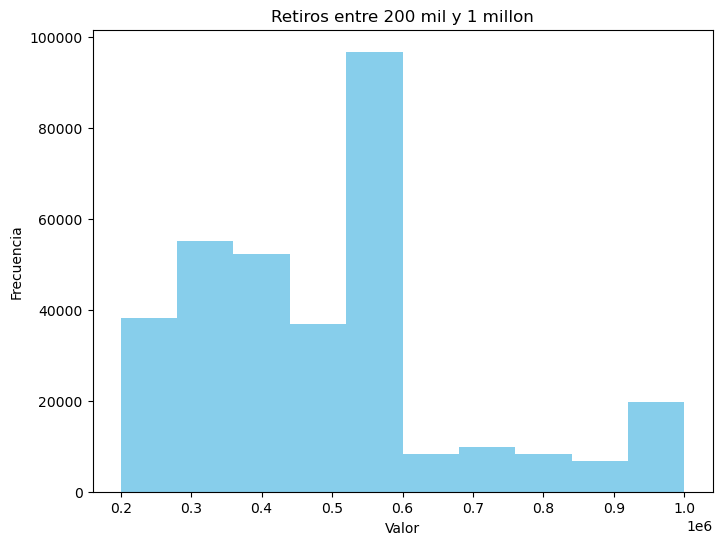

In [42]:
# Seleccionar la columna 'Valor'
valores1 = data1['Valor']

# Calcular los límites de los bins
min_valor = valores1.min()
max_valor = valores1.max()
bins = [min_valor + (max_valor - min_valor) * i / 10 for i in range(11)]  # 11 bins en total

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(valores1, bins=bins, color='skyblue')

# Personalizar la gráfica
plt.title('Retiros entre 200 mil y 1 millon')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()


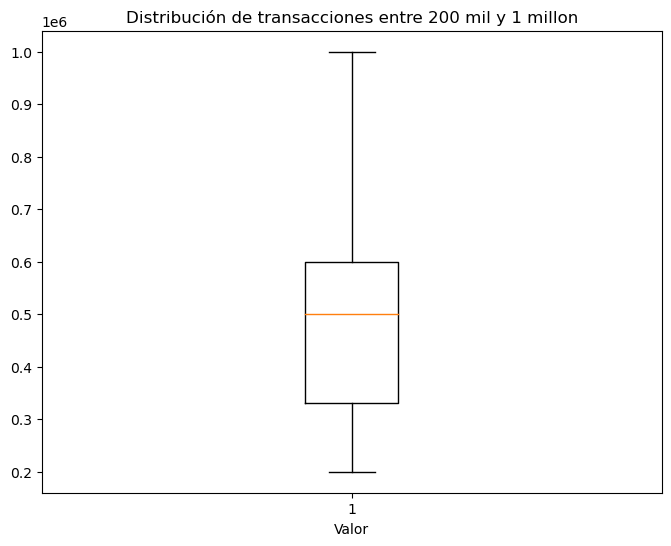

In [43]:
# Seleccionar la columna 'Valor'
valores2 = data1['Valor']

# Crear el boxplot con Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(valores2)

# Personalizar la gráfica
plt.title('Distribución de transacciones entre 200 mil y 1 millon')
plt.xlabel('Valor')

# Mostrar la gráfica
plt.show()

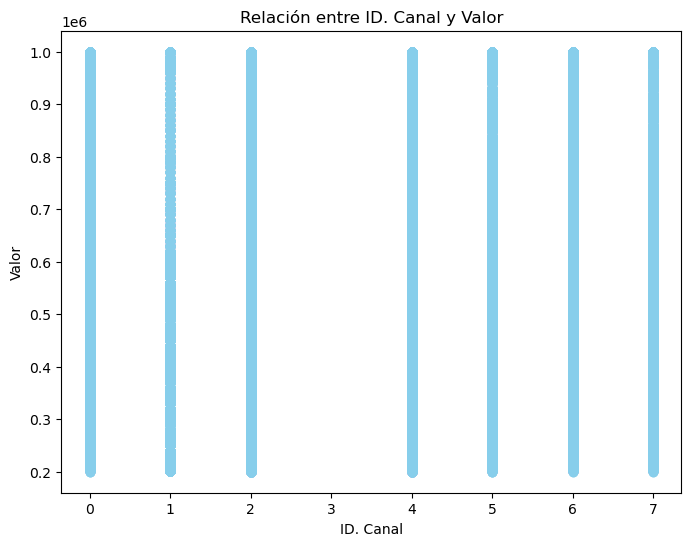

In [44]:
# Seleccionar las columnas de interés
columnas_interes = ['ID. Canal', 'Valor']
subset_data = data1[columnas_interes]

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(subset_data['ID. Canal'], subset_data['Valor'], color='skyblue')

# Personalizar la gráfica
plt.title('Relación entre ID. Canal y Valor')
plt.xlabel('ID. Canal')
plt.ylabel('Valor')

# Mostrar la gráfica
plt.show()


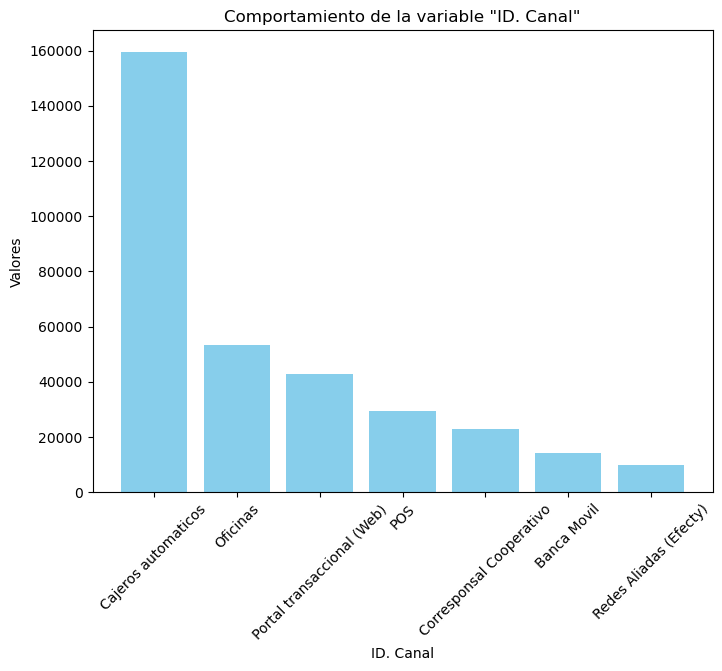

In [45]:
# Obtener los conteos de cada valor en la columna 'ID. Canal'
conteo_canales = data1['Nombre Canal'].value_counts()

# Crear la gráfica de barras horizontales
plt.figure(figsize=(8, 6))
plt.bar(conteo_canales.index, conteo_canales.values, color='skyblue')

# Personalizar la gráfica
plt.title('Comportamiento de la variable "ID. Canal"')
plt.xlabel('ID. Canal')
plt.ylabel('Valores')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

<h1> Insights</h1>
<h2> Analisis Rango 2. Transacciones entre $ 50.000 y $ 200.000 COP</h2>
<li> El canal "Sistema de Audio respuesta (IVR)" no se utiliza cuando los usuarios realizan movimientos de dinero entre $ 50.000 y $ 200.000. El resto de canales se comportan de manera muy uniforme con respecto al valor retirado.
<li> La mayor concentración de las transacciones en este rango se da entre $ 80.000 y $ 100.000
<li> Los principales canales para las transacciones de este monto son: POS, Cajeros automaticos, Portal transaccional (Web). De lo que podemos inferir que para este monto de transacciónes los usuarios no usan tanto las oficinas y pasa como principal canal el POS, lo que nos dice que los clientes realizan compras en establecimientos con la tarjeta de la red, cuando el valor de la compra es inferior a $ 200.000.
<li> Con el anterior Insights, se puede hacer un planteamiento a la alta dirección y analizar los lugares en los cuales las personas de la red compran en canales POS, con el fin de cubrir necesidades y hacer que este canal para transacciones superiores a $ 200.000 aumente.

In [46]:
data2 = df_2[df_2['Rango'] == 8]

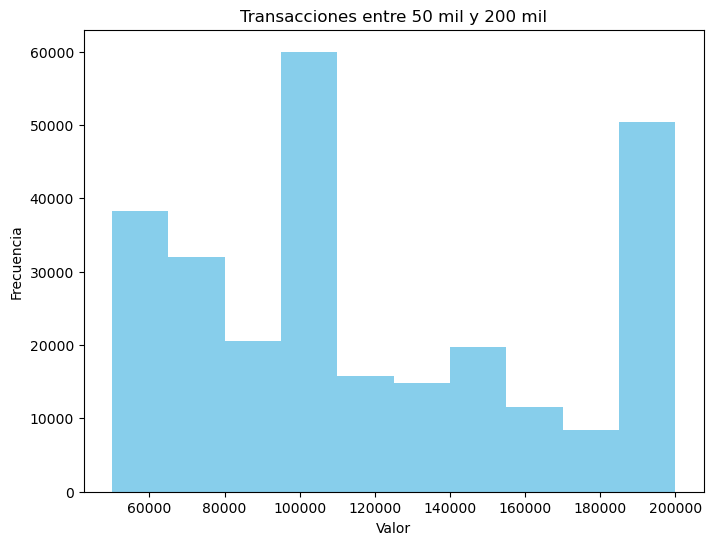

In [47]:
# Seleccionar la columna 'Valor'
valores = data2['Valor']

# Calcular los límites de los bins
min_valor = valores.min()
max_valor = valores.max()
bins = [min_valor + (max_valor - min_valor) * i / 10 for i in range(11)]  # 11 bins en total

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(valores, bins=bins, color='skyblue')

# Personalizar la gráfica
plt.title('Transacciones entre 50 mil y 200 mil')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

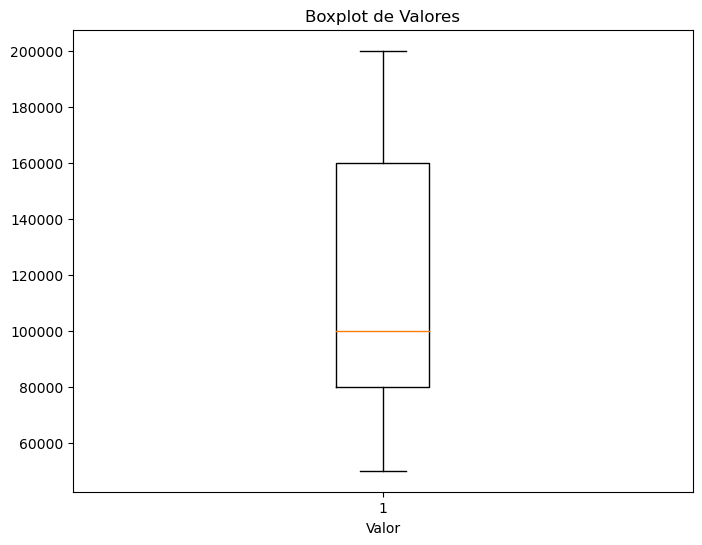

In [48]:
# Seleccionar la columna 'Valor'
valores = data2['Valor']

# Crear el boxplot con Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(valores)

# Personalizar la gráfica
plt.title('Boxplot de Valores')
plt.xlabel('Valor')

# Mostrar la gráfica
plt.show()

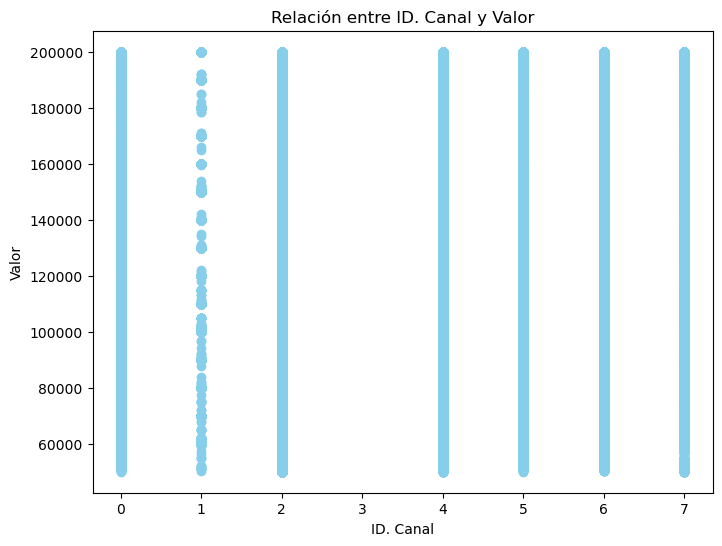

In [49]:
# Seleccionar las columnas de interés
columnas_interes = ['ID. Canal', 'Valor']
subset_data = data2[columnas_interes]

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(subset_data['ID. Canal'], subset_data['Valor'], color='skyblue')

# Personalizar la gráfica
plt.title('Relación entre ID. Canal y Valor')
plt.xlabel('ID. Canal')
plt.ylabel('Valor')

# Mostrar la gráfica
plt.show()

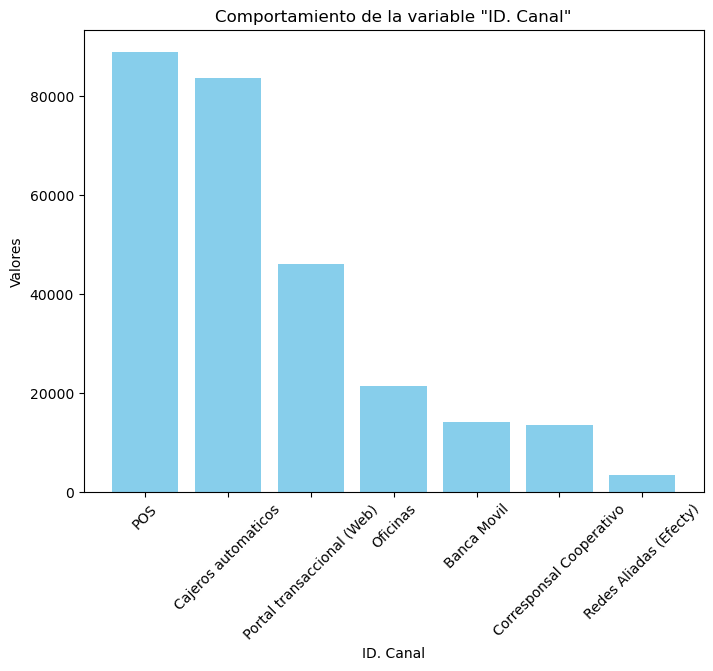

In [50]:
# Obtener los conteos de cada valor en la columna 'ID. Canal'
conteo_canales = data2['Nombre Canal'].value_counts()

# Crear la gráfica de barras horizontales
plt.figure(figsize=(8, 6))
plt.bar(conteo_canales.index, conteo_canales.values, color='skyblue')

# Personalizar la gráfica
plt.title('Comportamiento de la variable "ID. Canal"')
plt.xlabel('ID. Canal')
plt.ylabel('Valores')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


<h1> Insights</h1>
<h2> Analisis Transacciones con valor cero. </h2>
<li> Las transacciones con valor igual a cero, tienen una gran participación entre "Retiros", "Consulta de saldo" y "Compra". El objetivo es seguir analizando este comportamiento de las transacciones en cero, con el fin de detectar errorer por parte de la administración de la red y de esta manera garantizar una mejora continua de cara al usuario.

In [52]:
data3 = df_2[df_2['Rango'] == 9]


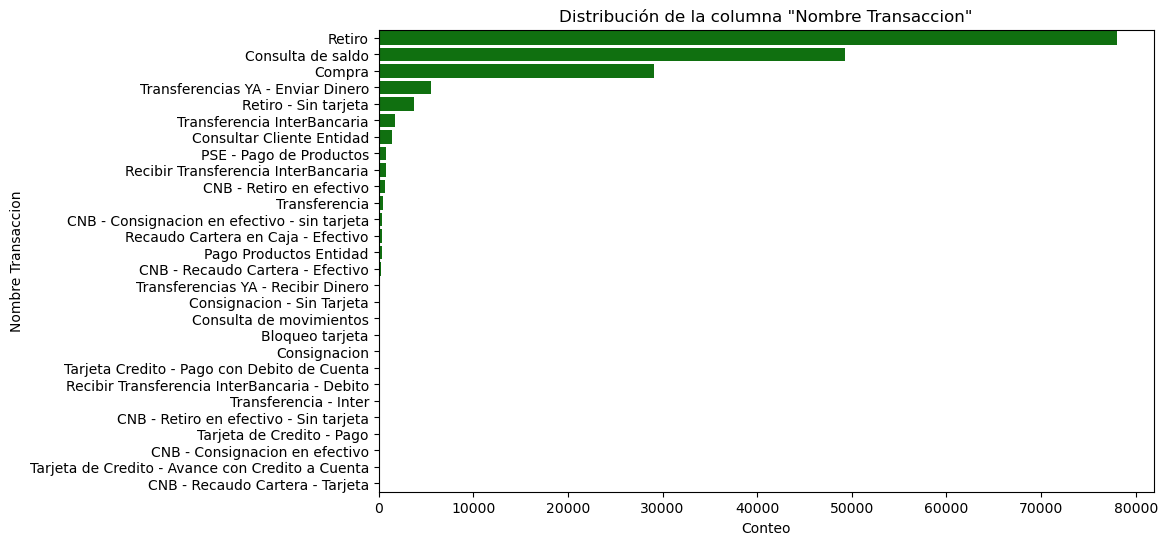

In [60]:
# Seleccionar la columna 'Nombre Transaccion'
nombre_transaccion = data3['Nombre Transaccion']

# Contar las ocurrencias de cada valor
conteo_transacciones = nombre_transaccion.value_counts()

# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_transacciones.values, y=conteo_transacciones.index, color='green')

# Personalizar la gráfica
plt.title('Distribución de la columna "Nombre Transaccion"')
plt.xlabel('Conteo')
plt.ylabel('Nombre Transaccion')

# Mostrar la gráfica
plt.show()


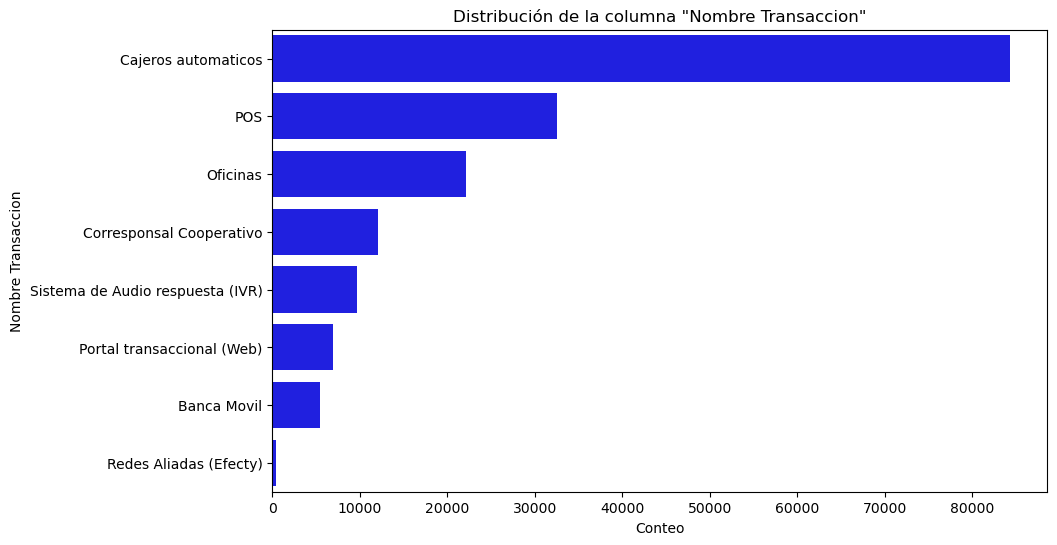

In [65]:
# Seleccionar la columna 'Nombre Transaccion'
nombre_transaccion = data3['Nombre Canal']

# Contar las ocurrencias de cada valor
conteo_transacciones = nombre_transaccion.value_counts()

# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_transacciones.values, y=conteo_transacciones.index, color='blue')

# Personalizar la gráfica
plt.title('Distribución de la columna "Nombre Transaccion"')
plt.xlabel('Conteo')
plt.ylabel('Nombre Transaccion')

# Mostrar la gráfica
plt.show()